# Graph - Bolleman Problem


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import time

In [5]:
# create class for graph visualization
class GraphVisualization:
  def __init__(self, graph):
    self.G = nx.Graph()
    self.graph = graph
    self.nodes = list(graph.keys())

  # method for add edges
  def addEdge(self, a, b, weight):
    self.G.add_edge(a, b, weight=weight)

  # method for visualize a graph
  def visualize(self):
    pos = nx.spring_layout(self.G)
    weights = nx.get_edge_attributes(self.G, "weight")

    self.G.add_nodes_from(self.nodes)
    plt.figure()
    nx.draw(
      self.G, pos, edge_color='black', width=1, linewidths=1,
      node_size=500, node_color='pink', alpha=0.9,
      labels={node: node for node in self.G.nodes()}
    )
    nx.draw_networkx_edge_labels(self.G, pos, edge_labels=weights)
    plt.axis('off')
    plt.show()

  # visualize a graph
  def graph_visualize(self):
    for i in self.graph:
      for j in self.graph[i]:
        self.addEdge(i, j['v'], j['w'])

    self.visualize()

In [28]:
# Created graph
graph = {
    'V1': [{'v': 'V2','w': 2}, {'v': 'V4','w': 1}, {'v': 'V3', 'w': 8}],
    'V2': [{'v': 'V1','w': 2}, {'v': 'V5','w': 1}, {'v': 'V3','w': 6}],
    'V3': [{'v': 'V1','w': 8}, {'v': 'V2','w': 6}, {'v': 'V4','w': 7}, {'v': 'V5','w': 5}, {'v': 'V6','w': 1}, {'v': 'V7','w': 2}],
    'V4': [{'v': 'V1','w': 1}, {'v': 'V3','w': 7}, {'v': 'V7','w': 9}],
    'V5': [{'v': 'V2','w': 1}, {'v': 'V3','w': 5}, {'v': 'V6','w': 3}, {'v': 'V9','w': 7}],
    'V6': [{'v': 'V3','w': 1}, {'v': 'V5','w': 3}, {'v': 'V9','w': 9}, {'v': 'V7','w': 4}],
    'V7': [{'v': 'V3','w': 2}, {'v': 'V4','w': 9}, {'v': 'V6','w': 4}, {'v': 'V9','w': 3}, {'v': 'V10','w': 1}],
    'V8': [{'v': 'V5','w': 2}, {'v': 'V9','w': 7}, {'v': 'V11','w': 9}],
    'V9': [{'v': 'V5','w': 9}, {'v': 'V6','w': 6}, {'v': 'V7','w': 3}, {'v': 'V8','w': 7}, {'v': 'V10','w': 1}, {'v': 'V11','w': 2}],
    'V10': [{'v': 'V7','w': 1}, {'v': 'V9','w': 1}, {'v': 'V11','w': 4}],
    'V11': [{'v': 'V8','w': 9}, {'v': 'V9','w': 2}, {'v': 'V10','w': 4}],
}

In [29]:
# Create bellman ford algorithm

def bellmanFord(graph, src: str, dest: str):
    INF = 9999
    dist = {}
    prev = {}
    for node in graph:
        dist[node] = INF
        prev[node] = None
    dist[src] = 0

    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbor in graph[node]:
                if dist[neighbor['v']] > dist[node] + neighbor['w']:
                    dist[neighbor['v']] = dist[node] + neighbor['w']
                    prev[neighbor['v']] = node

    for node in graph:
        for neighbor in graph[node]:
            assert dist[neighbor['v']] <= dist[node] + neighbor['w'], "Negative cycle exists"

    path = []
    node = dest
    while node is not None:
        path.append(node)
        node = prev[node]
    path = path[::-1]

    return path, dist[dest]



        

In [39]:
star = time.time()
shortest_path, dist=  bellmanFord(graph, 'V1', 'V11')
end = time.time()

for i in shortest_path:
    print(i, end=" ")
print()
print("Total distance: ", dist)
print("Time execution: ", end - star)


V1 V2 V5 V9 V11 
Total distance:  12
Time execution:  0.0


# Visualization Result

0 V1
1 V2
2 V5
3 V9
4 V11
{'V1': [{'v': 'V2', 'w': 2}], 'V2': [{'v': 'V5', 'w': 1}], 'V5': [{'v': 'V9', 'w': 7}], 'V9': [{'v': 'V11', 'w': 2}]}


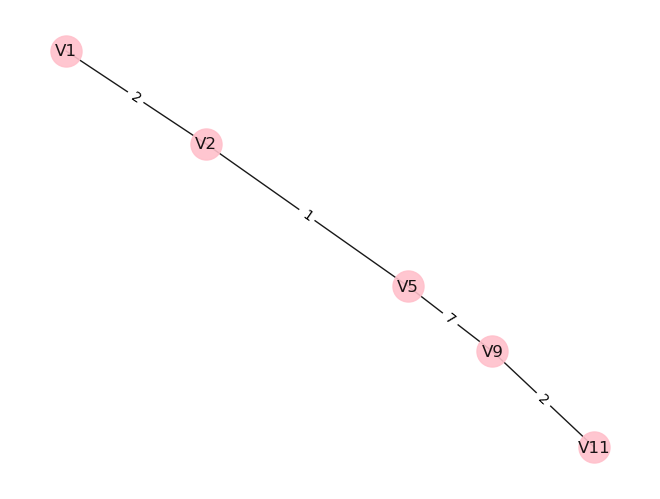

In [44]:
# Create table for result
shortest_graph = {}

for index, value in enumerate(shortest_path):
    try:
        for j in graph[value]:
            if j['v'] == shortest_path[index + 1]:
                shortest_graph.update({value: [j]})
    except:
        break 
S = GraphVisualization(shortest_graph)

for i in shortest_graph:
  for j in shortest_graph[i]:
        S.addEdge(i, j['v'], j['w'])

S.visualize()
